In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

wagesDF = pd.read_csv(filepath_or_buffer="./data/Wage.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
Unnamed: 0    3000 non-null int64
year          3000 non-null int64
age           3000 non-null int64
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 281.4+ KB


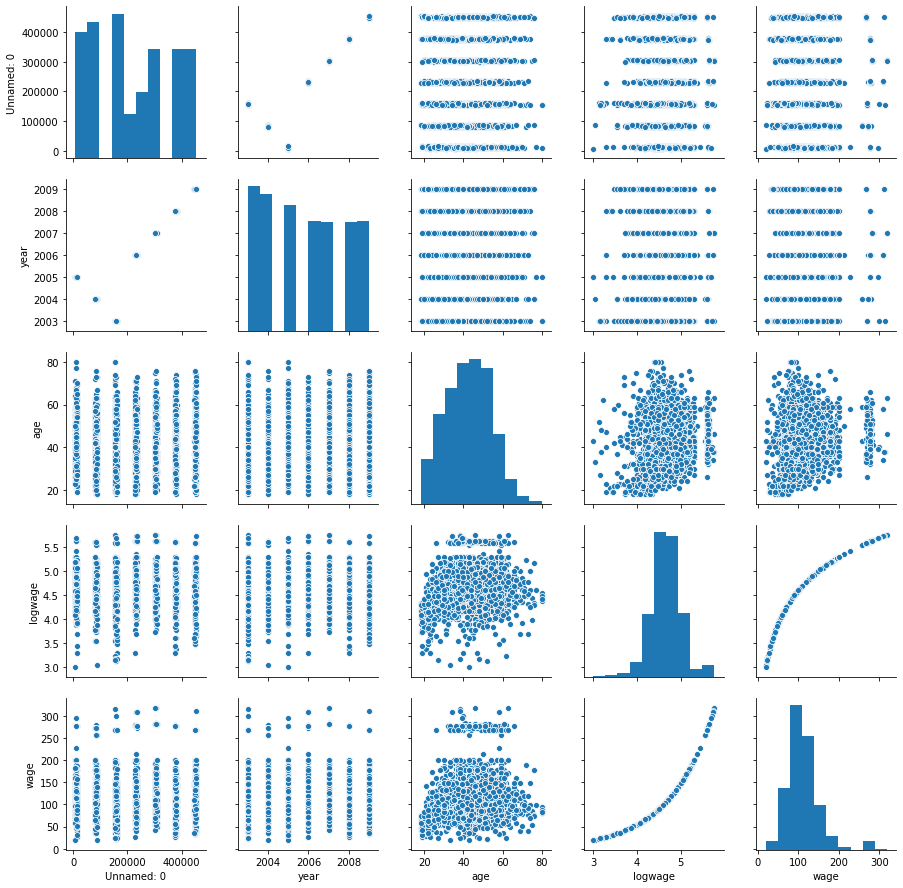

In [19]:

#EDA

wagesDF.info() 
wagesDF.columns
wagesDF.describe()
sns.pairplot(wagesDF)

# wagesDF.columns
#correlation - not much here since only wage in numerical data
# sns.heatmap(wagesDF.corr(), annot=True)



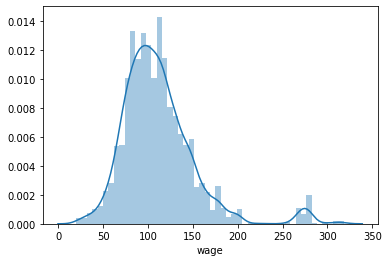

In [20]:
#since we are intrested in wage - distribution of wage 
sns.distplot(wagesDF['wage'])


In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('wage ~ age', data=wagesDF).fit()
model2 = ols('wage ~ age + np.power(age,2)', data=wagesDF).fit()
model3 = ols('wage ~ age + np.power(age,2) + np.power(age,3)', data=wagesDF).fit()
model4 = ols('wage ~ age + np.power(age,2) +  np.power(age,3) + np.power(age,4)', data=wagesDF).fit()
model5 = ols('wage ~ age + np.power(age,2) +  np.power(age,3) + np.power(age,4) + np.power(age,5)', data=wagesDF).fit()

anova = sm.stats.anova_lm(model, model2, model3, model4, model5)
anova


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


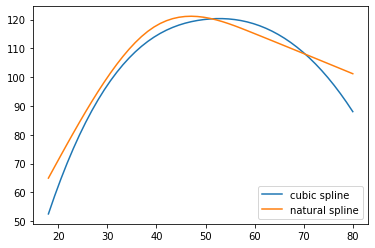

In [25]:
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt

#patsy is used for statistical transform like standradise ,centering to feed into models
#https://www.youtube.com/watch?v=bf7l95J0s7c
# mat = patsy.dmatrices("y ~ a + b ", data, return_type='dataframe')[1]

cubicDM = patsy.dmatrix('bs(x,df=4)', {'x': wagesDF['age']})
cubicFit = sm.GLM(wagesDF['wage'], cubicDM).fit()

# print to see the designmatrix/df produced which based on piecewise polynomial transformation
# print(cubicDM)

naturalcubicDM = patsy.dmatrix('cr(x,df=4)', {'x': wagesDF['age']})
naturalcubicFit = sm.GLM(wagesDF['wage'], naturalcubicDM).fit()

#plot

xp = np.linspace(wagesDF['age'].min(), wagesDF['age'].max(), 50)

cubicPred = cubicFit.predict(patsy.dmatrix('bs(x,df=4)', {'x': xp}))
naturalcubicPred = naturalcubicFit.predict(patsy.dmatrix('cr(x,df=4)', {'x': xp}))


plt.plot(xp, cubicPred, label='cubic spline')
plt.plot(xp, naturalcubicPred, label='natural spline')
plt.legend()
plt.show()
